# 데이터시각화 중간고사 연습문제

> "작성 완료"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [python]

In [1]:
import pandas as pd 
import numpy as np 
from plotnine import * 
import matplotlib.pyplot as plt 
import seaborn as sns

`-` 흠 20분 걸렸는데... 조금 느리다

# Type I. 프로그램 구현능력 평가

In [2]:
np.random.seed(202016248)

In [3]:
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.normal(1, 1, 10000)

<AxesSubplot:ylabel='Count'>

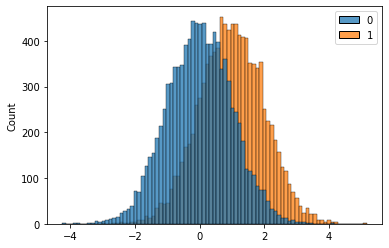

In [4]:
sns.histplot([x1, x2])

In [62]:
x = [1, 2, 3, 4]
y = [1, 2, 4, 3]

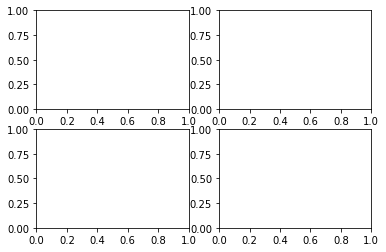

In [63]:
fig, axs = plt.subplots(2,2)

In [64]:
(ax1, ax2), (ax3, ax4) = axs

In [65]:
ax1.plot(x, y, 'o:r')
ax2.plot(x, y, 'Xb')
ax3.plot(x, y, 'xm')
ax4.plot(x, y, '.--k')

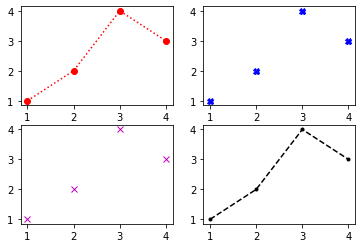

In [66]:
fig

# Type II. 개념의 이해 평가

`(1)` 하니, 홍두깨

`(2)` 하니, 나애리

# Type III. 자료분석 및 시각화 능력 종합평가

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/employee.csv')
df

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


## (a)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        1886 non-null   float64
 4   RACE               1965 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           1997 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


In [7]:
df.isnull().sum()

UNIQUE_ID              0
POSITION_TITLE         0
DEPARTMENT             0
BASE_SALARY          114
RACE                  35
EMPLOYMENT_TYPE        0
GENDER                 0
EMPLOYMENT_STATUS      0
HIRE_DATE              0
JOB_DATE               3
dtype: int64

In [8]:
df.isnull().sum().sum()

152

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          1853 non-null   int64  
 1   POSITION_TITLE     1853 non-null   object 
 2   DEPARTMENT         1853 non-null   object 
 3   BASE_SALARY        1853 non-null   float64
 4   RACE               1853 non-null   object 
 5   EMPLOYMENT_TYPE    1853 non-null   object 
 6   GENDER             1853 non-null   object 
 7   EMPLOYMENT_STATUS  1853 non-null   object 
 8   HIRE_DATE          1853 non-null   object 
 9   JOB_DATE           1853 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 159.2+ KB


In [11]:
df.isnull().sum()

UNIQUE_ID            0
POSITION_TITLE       0
DEPARTMENT           0
BASE_SALARY          0
RACE                 0
EMPLOYMENT_TYPE      0
GENDER               0
EMPLOYMENT_STATUS    0
HIRE_DATE            0
JOB_DATE             0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

## (b) 

In [13]:
df_ = df.groupby(by = 'GENDER').agg({'BASE_SALARY':np.mean})
df_

,BASE_SALARY
GENDER,
Female,52474.665487
Male,57670.031832


In [14]:
df_ = df_.stack().reset_index()
df_

,GENDER,level_1,0
0,Female,BASE_SALARY,52474.665487
1,Male,BASE_SALARY,57670.031832


In [24]:
(df_.query('GENDER == "Female"'))[0].to_list() > (df_.query('GENDER == "Male"'))[0].to_list()

False

`-` 남자 급여평균이 더 크다

## (c) 

In [54]:
df2 = df.groupby(by = ['RACE','GENDER']).agg({'BASE_SALARY':[np.mean, min, max]})

In [80]:
df2

BASE_SALARY                   
                                                  mean      min       max
RACE                              GENDER                                 
American Indian or Alaskan Native Female  60238.800000  26125.0   98536.0
                                  Male    60305.400000  26125.0   81239.0
Asian/Pacific Islander            Female  63226.300000  26125.0  130416.0
                                  Male    61033.906667  27914.0  163228.0
Black or African American         Female  48965.790378  24960.0  150416.0
                                  Male    51118.867374  26125.0  275000.0
Hispanic/Latino                   Female  46503.316176  26125.0  126115.0
                                  Male    54767.541538  26104.0  165216.0
Others                            Female  63785.000000  63785.0   63785.0
                                  Male    38771.000000  38771.0   38771.0
White                             Female  66793.352941  27955.0  178331.0
                                  Male    63940.388119  26125.0  210588.0

`-` tidydata로 만들자!

In [81]:
df2.stack()

BASE_SALARY
RACE                              GENDER                    
American Indian or Alaskan Native Female mean   60238.800000
                                         min    26125.000000
                                         max    98536.000000
                                  Male   mean   60305.400000
                                         min    26125.000000
                                         max    81239.000000
Asian/Pacific Islander            Female mean   63226.300000
                                         min    26125.000000
                                         max   130416.000000
                                  Male   mean   61033.906667
                                         min    27914.000000
                                         max   163228.000000
Black or African American         Female mean   48965.790378
                                         min    24960.000000
                                         max   150416.000000
                                  Male   mean   51118.867374
                                         min    26125.000000
                                         max   275000.000000
Hispanic/Latino                   Female mean   46503.316176
                                         min    26125.000000
                                         max   126115.000000
                                  Male   mean   54767.541538
                                         min    26104.000000
                                         max   165216.000000
Others                            Female mean   63785.000000
                                         min    63785.000000
                                         max    63785.000000
                                  Male   mean   38771.000000
                                         min    38771.000000
                                         max    38771.000000
White                             Female mean   66793.352941
                                         min    27955.000000
                                         max   178331.000000
                                  Male   mean   63940.388119
                                         min    26125.000000
                                         max   210588.000000

In [55]:
df3 = df2.stack().reset_index().rename(columns={'level_2':'aggtype'})

In [56]:
df3

,RACE,GENDER,aggtype,BASE_SALARY
0,American Indian or Alaskan Native,Female,mean,60238.800000
1,American Indian or Alaskan Native,Female,min,26125.000000
2,American Indian or Alaskan Native,Female,max,98536.000000
3,American Indian or Alaskan Native,Male,mean,60305.400000
4,American Indian or Alaskan Native,Male,min,26125.000000
5,American Indian or Alaskan Native,Male,max,81239.000000
6,Asian/Pacific Islander,Female,mean,63226.300000
7,Asian/Pacific Islander,Female,min,26125.000000
8,Asian/Pacific Islander,Female,max,130416.000000
9,Asian/Pacific Islander,Male,mean,61033.906667


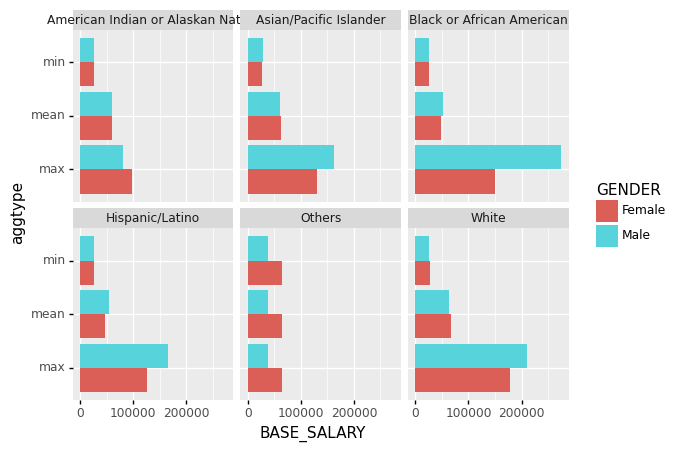

<ggplot: (135580437071)>

In [84]:
ggplot(data = df3) + geom_bar(aes(x = 'aggtype', y = 'BASE_SALARY', fill = 'GENDER'), stat = 'identity', position = 'dodge')\
+ coord_flip() + facet_wrap(facets = 'RACE')